# Practical Work 4 - Autoencoder
# Question 1 : Multilayer perceptron based Autoencoder

## Introduction

Main goal: build a two-layer autoencoder using Keras
- the encoder compresses the information in the latent space;
- the decoder reconstructs the image.

## Imports

In [ ]:
# Classical libraries
import numpy as np
import matplotlib.pyplot as plt

# Keras via Tensorflow library
import tensorflow.keras as tk

# Import datasets, layers, models and optimizers.
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

## MNIST dataset loading
The MNIST data is loaded. The parameters of the database are retrieved (number of examples, of classes, size of the retina)

Remark : The MNIST (Mixed National Institute of Standards and Technology) database is a database of handwritten numbers. It is a standard database for testing new algorithms for recognizing these digits. It consists of 60000 training images and 10000 test images. Grayscale images are normalized and centered with the size of 28 pixels and 28 pixels.


The MNIST data is then loaded. The parameters of the database are retrieved (number of examples, of classes, size of the retina).

In [ ]:
# MNIST dataset loading
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Number of samples in the training dataset
num_examples = x_train.shape[0] 
# Number of samples in the test dataset
num_test = x_test.shape[0]
# Size of the input layer (retina) = number of pixels of the MNIST images (784 pixels)
num_input = x_train.shape[1]*x_train.shape[2]
# Number of classes ( the 10 digits : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9})
num_classes = 10

# Width ( and height) of the images
img_size = x_train.shape[1] 
# Size of (square) image
img_shape = (img_size, img_size)

# Reshape of datatsets in array and normalization
x_train = x_train.reshape((num_examples, num_input))
x_test  = x_test.reshape((num_test, num_input))
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Print
print('Size of the retina : ',num_input)
print("Number of samples  : ",num_examples)

# Converts the label arrays (integers) to binary class matrix.
y_train = tk.utils.to_categorical(y_train, num_classes)
y_test = tk.utils.to_categorical(y_test, num_classes)

Size of the retina :  784
Number of samples  :  60000


## Construction of the model (Multilayer perceptron based Autoencoder)
### Global parameters of the algorithm

In [ ]:
# Parameters of the algorithm
lr = 0.001
num_epochs = 50
batch_size = 256

# Numbers of neurons for the two hidden layers
n_hidden_1 = 256 
n_hidden_2 = 128

### Definition of encoder
The potentials are dot products + bias and the activation functions are the ReLUs.
- Input : [Input() is used to instantiate a Keras tensor](https://www.tensorflow.org/api_docs/python/tf/keras/Input);
- FCL   : [Fully-connected layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense).

In [ ]:
input_img = Input(shape=(num_input,))
encoded = Dense(n_hidden_1, activation='relu')(input_img)
encoded = Dense(n_hidden_2, activation='relu')(encoded)

### Definition of decoder

In [ ]:
decoded = Dense(n_hidden_1, activation='relu')(encoded)
decoded = Dense(num_input, activation='sigmoid')(decoded)

### Definition of model : autoencoder with two hidden layers
- Model groups layers  : [Model groups layers into an object with training and inference features.](https://www.tensorflow.org/api_docs/python/tf/keras/Model).

In [ ]:
model = Model(input_img, decoded)

### Representation of latent space

In [ ]:
encoder = Model(input_img, encoded)

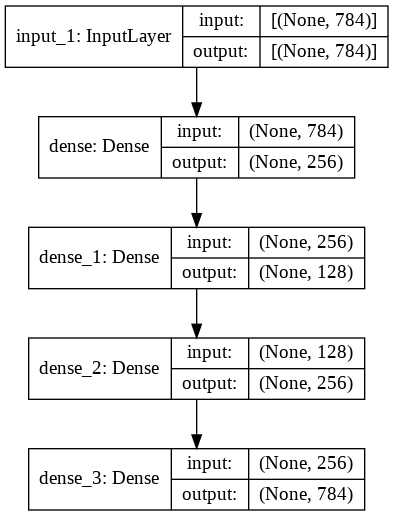

In [ ]:
tk.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Model construction (loss function & optimization prodedure)

In [ ]:
adam = Adam(lr=lr)
model.compile(loss='mse',optimizer=adam,metrics=['acc'])

### Learning and test

Epoch 0 Accuracy :0.012 


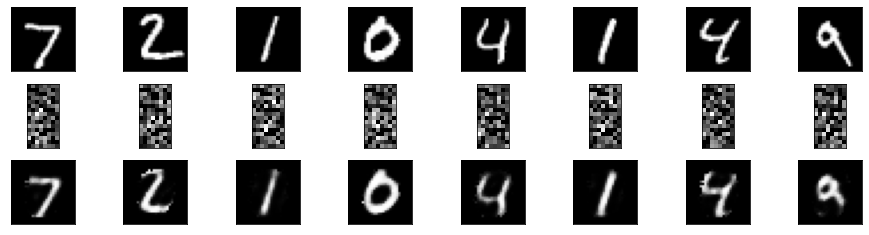

Epoch 20 Accuracy :0.015 


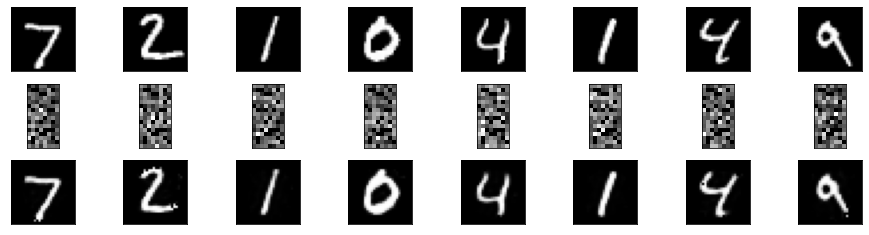

Epoch 40 Accuracy :0.014 


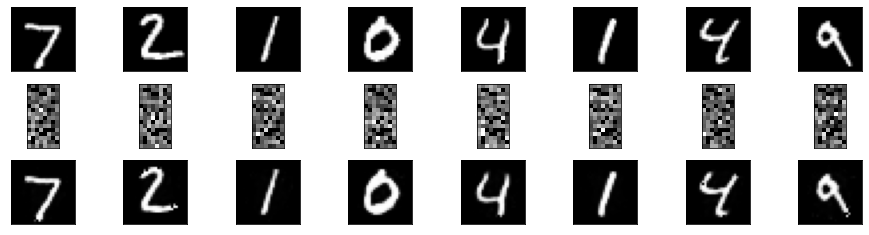

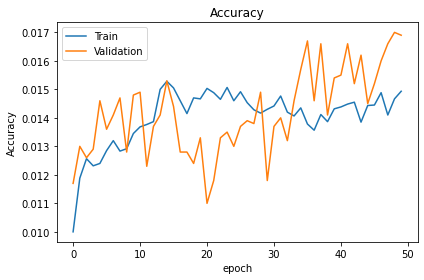

In [ ]:
class myCallback(tk.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if((epoch-1) % 20==0):   
            print("Epoch {0:d} Accuracy :{1:5.3f} ".format(epoch-1,logs.get('acc') ))
            encoded_imgs = encoder.predict(x_test)
            decoded_imgs = model.predict(x_test)


            n = 8  
            plt.figure(figsize=(40, 4))
            for i in range(n):
                ax = plt.subplot(3, 20, i + 1)
                plt.imshow(x_test[i].reshape(img_size, img_size))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, i + 1 + 20)
                plt.imshow(encoded_imgs[i].reshape(16,8))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

                ax = plt.subplot(3, 20, 2*20 +i+ 1)
                plt.imshow(decoded_imgs[i].reshape(img_size, img_size))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)

            plt.show()

            
callbacks = myCallback()

hist = model.fit(x_train, x_train,epochs=num_epochs,
                batch_size=batch_size,shuffle=True,verbose=0,
                validation_data=(x_test, x_test),callbacks=[callbacks])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.tight_layout()